

Health & Lifestyle Dataset – Analyze Well-being, Habits, and Trends Easily

Sleep, Exercise, and Heart Health

Goal: Investigate how sleep hours and exercise relate to:

- Heart Rate

- Blood Pressure

- Heart Disease

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [4]:
#Configuring Pandas to show all rows and columns.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
# Open dataset
df = pd.read_csv('C:\\Users\\Luis\\Downloads\\health_activity_data.csv',)


In [6]:
df.head()

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease
0,1,56,Male,164,81,30.72,5134,1796,8.6,102,137/72,8.1,No,7,No,No
1,2,69,Male,156,82,20.86,12803,1650,4.5,103,129/65,3.7,No,7,No,No
2,3,46,Female,158,65,30.93,16408,1756,4.3,74,127/68,3.2,Yes,0,No,No
3,4,32,Male,197,87,31.19,18420,2359,4.1,116,125/86,8.5,No,5,No,No
4,5,60,Male,157,63,29.37,17351,2556,5.1,111,100/64,8.5,Yes,8,No,No


In [7]:
df = df.set_index('ID')

In [8]:
df.head()

,Age,Gender,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease
ID,,,,,,,,,,,,,,,
1,56,Male,164,81,30.72,5134,1796,8.6,102,137/72,8.1,No,7,No,No
2,69,Male,156,82,20.86,12803,1650,4.5,103,129/65,3.7,No,7,No,No
3,46,Female,158,65,30.93,16408,1756,4.3,74,127/68,3.2,Yes,0,No,No
4,32,Male,197,87,31.19,18420,2359,4.1,116,125/86,8.5,No,5,No,No
5,60,Male,157,63,29.37,17351,2556,5.1,111,100/64,8.5,Yes,8,No,No


In [9]:
df.isnull().sum()

Age                             0
Gender                          0
Height_cm                       0
Weight_kg                       0
BMI                             0
Daily_Steps                     0
Calories_Intake                 0
Hours_of_Sleep                  0
Heart_Rate                      0
Blood_Pressure                  0
Exercise_Hours_per_Week         0
Smoker                          0
Alcohol_Consumption_per_Week    0
Diabetic                        0
Heart_Disease                   0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1000 non-null   int64  
 1   Gender                        1000 non-null   object 
 2   Height_cm                     1000 non-null   int64  
 3   Weight_kg                     1000 non-null   int64  
 4   BMI                           1000 non-null   float64
 5   Daily_Steps                   1000 non-null   int64  
 6   Calories_Intake               1000 non-null   int64  
 7   Hours_of_Sleep                1000 non-null   float64
 8   Heart_Rate                    1000 non-null   int64  
 9   Blood_Pressure                1000 non-null   object 
 10  Exercise_Hours_per_Week       1000 non-null   float64
 11  Smoker                        1000 non-null   object 
 12  Alcohol_Consumption_per_Week  1000 non-null   int64  
 13  Diabetic

In [12]:
df.shape

(1000, 15)

In [13]:
df.describe()

,Age,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Exercise_Hours_per_Week,Alcohol_Consumption_per_Week
count,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,49.857000,174.74500,84.35200,26.729510,10717.034000,2327.117000,6.90990,84.710000,5.045500,4.573000
std,18.114267,14.54192,20.06596,4.786341,5444.707891,657.847942,1.77964,20.130155,2.847801,2.852509
min,18.000000,150.00000,50.00000,18.500000,1016.000000,1201.000000,4.00000,50.000000,0.000000,0.000000
25%,35.000000,162.00000,68.00000,22.600000,6028.250000,1745.750000,5.30000,67.000000,2.675000,2.000000
50%,50.000000,175.00000,84.00000,26.800000,10898.000000,2328.500000,6.90000,84.000000,5.100000,5.000000
75%,66.000000,187.00000,101.00000,30.850000,15253.250000,2880.000000,8.40000,103.000000,7.600000,7.000000
max,79.000000,199.00000,119.00000,34.980000,19931.000000,3498.000000,10.00000,119.000000,10.000000,9.000000


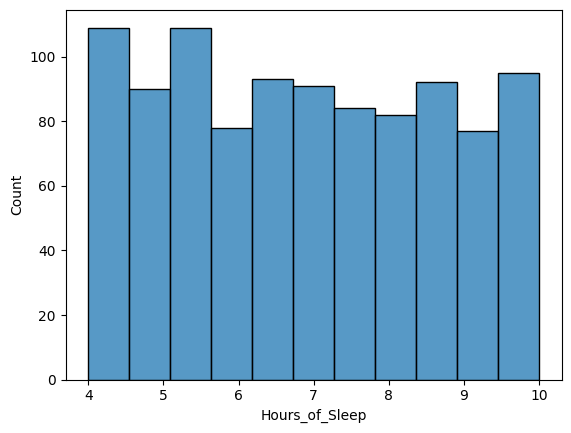

In [14]:
sns.histplot(data=df, x='Hours_of_Sleep')
plt.show()

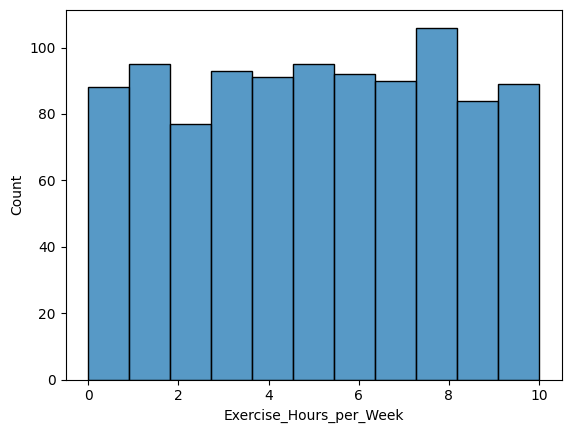

In [15]:
sns.histplot(data=df, x='Exercise_Hours_per_Week')
plt.show()

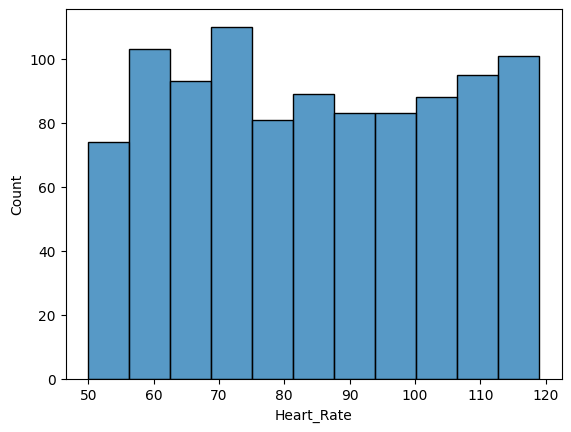

In [16]:
sns.histplot(data=df, x='Heart_Rate')
plt.show()

In [17]:
df['Heart_Disease'].value_counts().sort_index()

Heart_Disease
No     907
Yes     93
Name: count, dtype: int64

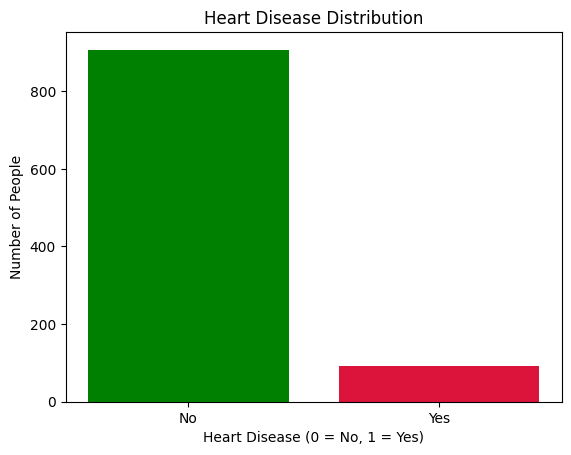

In [18]:
heart_disease_counts = df['Heart_Disease'].value_counts()


plt.bar(
    x=heart_disease_counts.index.astype(str),  # astype(str) makes sure your x-axis shows labels, not just numbers
    height=heart_disease_counts.values,
    color=['green', 'crimson'],
)

plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Number of People')
plt.show()

Sleep vs Heart health


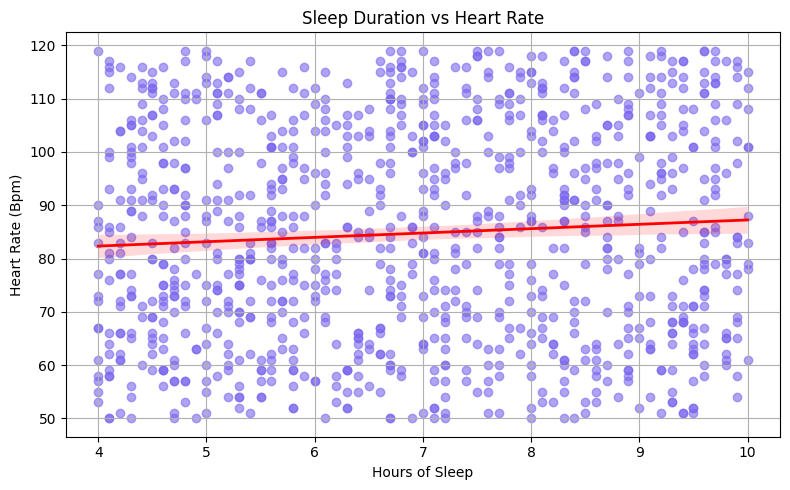

In [19]:
plt.figure(figsize=(8, 5))
sns.regplot(
    x='Hours_of_Sleep',
    y='Heart_Rate',
    data=df,
    scatter_kws={'alpha': 0.6, 'color': 'mediumslateblue'},
    line_kws={'color': 'red', 'linewidth': 2}
)
plt.title("Sleep Duration vs Heart Rate")
plt.xlabel("Hours of Sleep")
plt.ylabel("Heart Rate (Bpm)")
plt.grid(True)
plt.tight_layout()
plt.show()

The relationship is weak — sleep alone doesn’t explain much of the variation in heart rate.

There is no  correlation between sleep hours and heart rate.

Other factors (like fitness, stress, caffeine, etc.) probably play a big role in heart rate too.



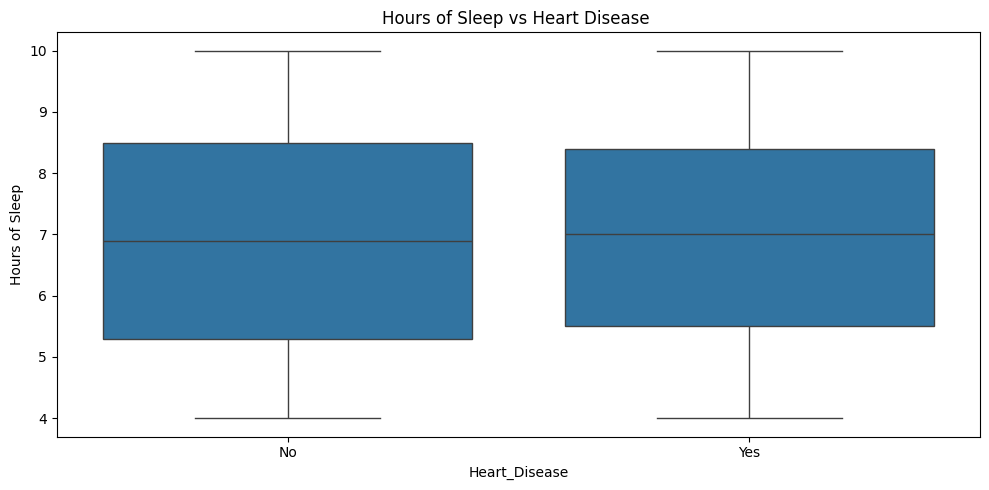

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Heart_Disease', y='Hours_of_Sleep', data=df)

plt.title('Hours of Sleep vs Heart Disease ')
plt.ylabel('Hours of Sleep')
plt.xlabel('Heart_Disease')
plt.tight_layout()
plt.show()

In [21]:
df.groupby('Heart_Disease')['Hours_of_Sleep'].describe()

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
No,907.0,6.909151,1.787587,4.0,5.3,6.9,8.5,10.0
Yes,93.0,6.917204,1.709476,4.0,5.5,7.0,8.4,10.0


Sleep duration alone doesn't differ significantly between individuals with and without heart disease — at least not visually.


Exercise vs Heart health

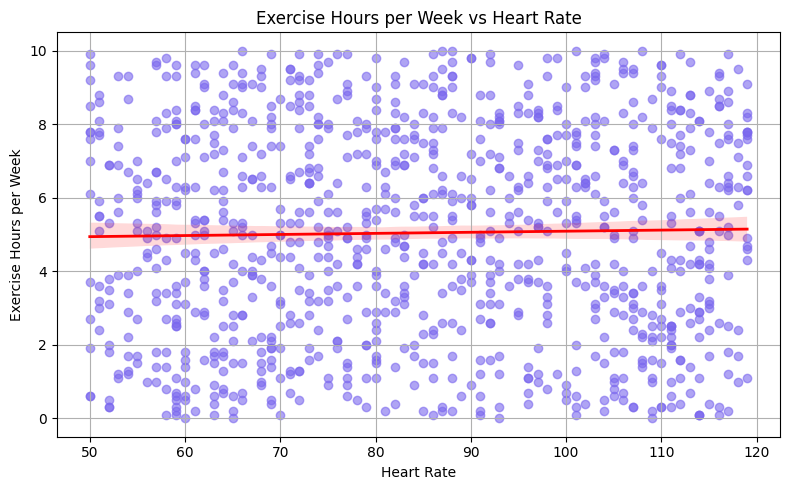

In [22]:
plt.figure(figsize=(8, 5))
sns.regplot(
    x='Heart_Rate',
    y='Exercise_Hours_per_Week',
    data=df,
    scatter_kws={'alpha': 0.6, 'color': 'mediumslateblue'},
    line_kws={'color': 'red', 'linewidth': 2}
)
plt.title("Exercise Hours per Week vs Heart Rate")
plt.xlabel("Heart Rate")
plt.ylabel("Exercise Hours per Week")
plt.grid(True)
plt.tight_layout()
plt.show()

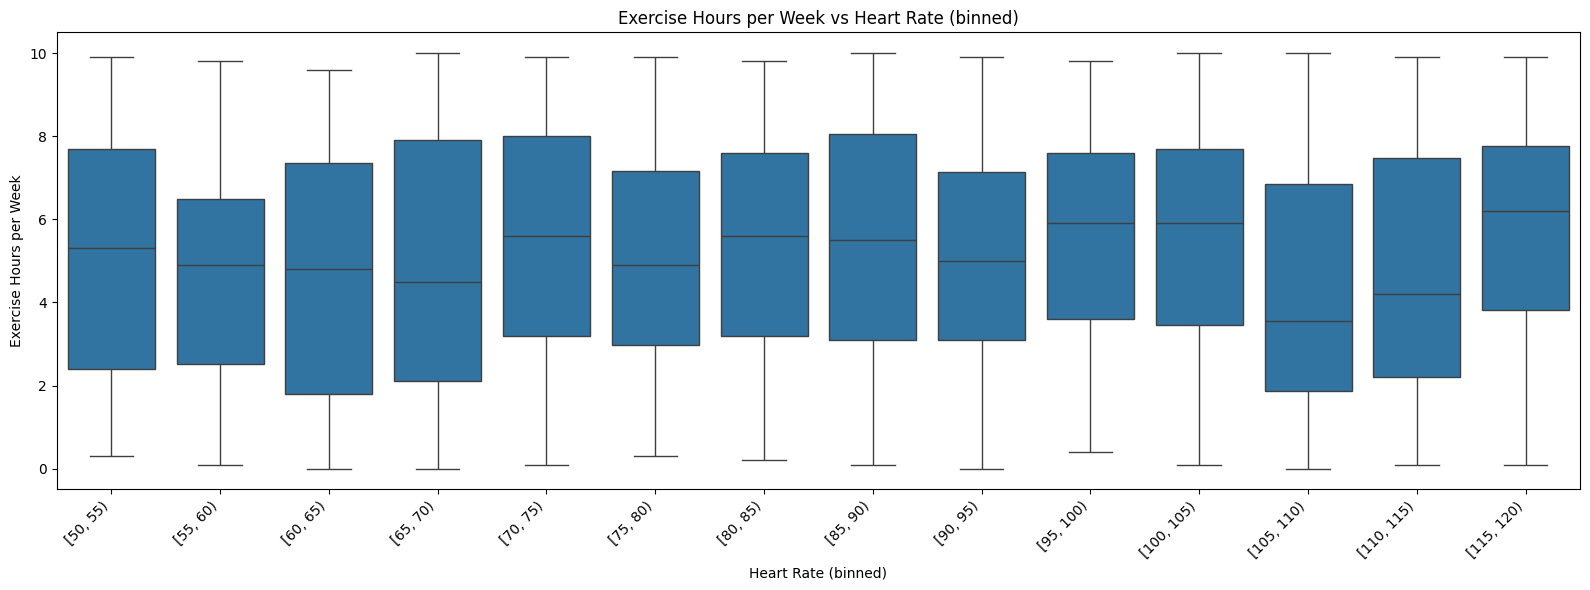

In [23]:
df['HR_bin'] = pd.cut(df['Heart_Rate'], bins=range(50, 125, 5), right=False) #Using 'pd.cut' to segment and sort data values into bins

plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='HR_bin', y='Exercise_Hours_per_Week')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Heart Rate (binned)")
plt.ylabel("Exercise Hours per Week")
plt.title("Exercise Hours per Week vs Heart Rate (binned)")
plt.tight_layout()
plt.show()

More hours of exercise per week are associated with a lower resting heart rate, supporting known cardiovascular fitness effects — although the relationship appears moderate or weak in this dataset.

Heart Disease vs No Heart Disease

In [24]:
avg_sleep = df.groupby('Heart_Disease')['Hours_of_Sleep'].mean()
print(avg_sleep)

Heart_Disease
No     6.909151
Yes    6.917204
Name: Hours_of_Sleep, dtype: float64


In [25]:
avg_exercise_hours = df.groupby('Heart_Disease')['Exercise_Hours_per_Week'].mean()
print(avg_exercise_hours)

Heart_Disease
No     5.041455
Yes    5.084946
Name: Exercise_Hours_per_Week, dtype: float64


In [26]:
# First, split into two new columns
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood_Pressure'].str.split('/', expand=True)

# Convert them to numeric
df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'], errors='coerce')
df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'], errors='coerce')


In [27]:
avg_hr_bp = df.groupby('Heart_Disease')[['Heart_Rate', 'Systolic_BP', 'Diastolic_BP']].mean().round(2)
print(avg_hr_bp)

               Heart_Rate  Systolic_BP  Diastolic_BP
Heart_Disease                                       
No                  84.82       113.86         74.71
Yes                 83.68       114.77         76.25


In this dataset, only blood pressure shows the clearest relationship with heart disease.
Sleep, exercise, and heart rate show no strong or clear differences between groups